<a href="https://colab.research.google.com/github/SoniaPMi/AI-3-PyTorch/blob/main/TransferAvP_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"soniaprez","key":"3f1246297c4fde7feb6047a06e7a5939"}'}

In [34]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

In [35]:
! kaggle datasets download -d pmigdal/alien-vs-predator-images

 64% 9.00M/14.1M [00:00<00:00, 16.9MB/s]
100% 14.1M/14.1M [00:00<00:00, 26.2MB/s]


In [37]:
! mkdir avp_data/
! unzip alien-vs-predator-images.zip -d avp_data

Archive:  alien-vs-predator-images.zip
  inflating: avp_data/alien_vs_predator_thumbnails/data/train/alien/0.jpg  
  inflating: avp_data/alien_vs_predator_thumbnails/data/train/alien/1.jpg  
  inflating: avp_data/alien_vs_predator_thumbnails/data/train/alien/10.jpg  
  inflating: avp_data/alien_vs_predator_thumbnails/data/train/alien/100.jpg  
  inflating: avp_data/alien_vs_predator_thumbnails/data/train/alien/101.jpg  
  inflating: avp_data/alien_vs_predator_thumbnails/data/train/alien/102.jpg  
  inflating: avp_data/alien_vs_predator_thumbnails/data/train/alien/103.jpg  
  inflating: avp_data/alien_vs_predator_thumbnails/data/train/alien/104.jpg  
  inflating: avp_data/alien_vs_predator_thumbnails/data/train/alien/105.jpg  
  inflating: avp_data/alien_vs_predator_thumbnails/data/train/alien/106.jpg  
  inflating: avp_data/alien_vs_predator_thumbnails/data/train/alien/107.jpg  
  inflating: avp_data/alien_vs_predator_thumbnails/data/train/alien/108.jpg  
  inflating: avp_data/alien_vs

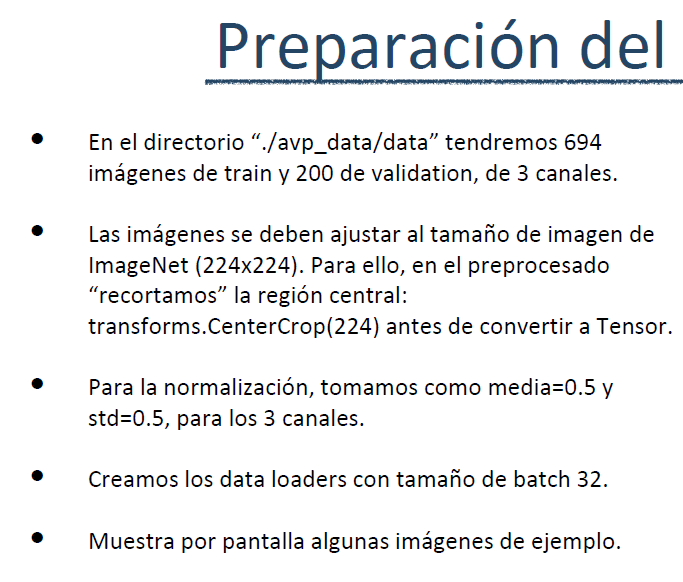

In [50]:
import torch
import torch.nn as nn
import torchvision
from __future__ import print_function, division
import os
from torchvision import datasets, models, transforms
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [52]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [53]:
vgg_based = torchvision.models.vgg19(pretrained=True)
print(vgg_based)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [55]:
#freexe the layers
for param in vgg_based.parameters():
  param.requires_grad = False

#Modify the last layer
number_features = vgg_based.classifier[6].in_features
layers = list(vgg_based.classifier.children())[:-1] #remove the last layer
layers.extend([torch.nn.Linear(number_features, len(class_names))])
vgg_based.classifier = torch.nn.Sequential(*layers)

vgg_based = vgg_based.to(device)

print(vgg_based)

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg_based.parameters(), lr=0.001, momentum=0.9)

NameError: ignored